# K-Nearest Neighbor(KNN())

## Predicting Breast Cancer(Wether a cell is Malingnant(have cancer) or Benign(Don't have cancer)

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("/Users/shyamgoyal/Desktop/UCI/Full Stack Data Scientist/Supervised Learning/K-nearest Neighbour(KNN)/wisc_bc_data.csv"
                  
                  )

In [90]:
print("dd")
df.head()

dd


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [91]:
df.shape

(569, 32)

In [92]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [93]:
# Changing the datatype of Diagnosis from "Object" to "Category"
df['diagnosis'] = df['diagnosis'].astype('category')

In [94]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [95]:
# Drop 'Id' column

df = df.drop(labels='id',axis=1)

In [96]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [97]:
X = df.drop(labels = 'diagnosis',axis=1)
Y = df['diagnosis']

In [98]:
Y

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['B', 'M']

In [99]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [100]:
# Standardize our data - As our dependent variables are not in the same scale, 
#                        some are very big and some are very small.
# Note: Make sure to seperate the X from Y before Standardization, 
# Data Leak - Sepeating the test from train to avoid the hint of y columns
from scipy.stats import zscore

Xscaled = X.apply(zscore)

In [101]:
Xscaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.287781e-16,-7.373520e-16,-1.303390e-16,-2.239958e-16,1.660457e-16,1.882891e-16,5.112099e-17,-4.760886e-17,1.465338e-16,-1.517240e-15,...,-8.507157e-17,6.634022e-18,-3.570665e-16,-1.888745e-16,-2.234104e-16,7.999850e-18,9.033976e-17,2.224348e-16,2.734583e-16,1.851672e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [102]:
Xscaled_df = pd.DataFrame(Xscaled)
Xscaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.271884,-0.248914,-0.316713,-0.334435,-1.544310,-0.841464,-0.504827,-0.521532,-1.305645,-1.035930,...,-0.283535,-0.291038,-0.362232,-0.339247,-0.182734,-0.367466,-0.405815,-0.153883,-1.077047,-0.814381
565,-1.098366,-1.065715,-1.061432,-0.947908,0.175047,-0.241650,-0.665279,-0.736396,-0.652127,1.028102,...,-1.116007,-1.009179,-1.083347,-0.920238,0.159186,-0.576756,-0.962232,-1.124731,-0.755108,0.051769
566,0.327386,0.726127,0.286312,0.158448,-0.412068,0.016280,-0.440043,-0.420162,-0.308938,0.052790,...,0.317004,0.383135,0.194763,0.162637,-0.099446,0.481144,0.435670,0.121718,0.443667,0.763308
567,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,...,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951


### Building the KNN Model

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [104]:
X_train,X_test, y_train, y_test = train_test_split(Xscaled_df,Y,test_size=0.30, random_state=1)

In [105]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
249,-0.604181,2.080480,-0.626051,-0.604056,-0.853294,-0.755046,-0.605769,-0.760127,-0.717843,-0.249159,...,-0.658355,1.987146,-0.660984,-0.627369,-0.507120,-0.436806,-0.436999,-0.661538,-0.734077,-0.111154
58,2.874993,0.211845,3.057588,3.145893,3.440117,3.455973,4.243589,3.927930,3.079138,0.846648,...,2.019222,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673
476,-0.589980,0.798266,-0.544495,-0.588983,-1.922199,0.056078,-0.117631,-0.493675,-2.222032,0.537611,...,-0.766038,0.493869,-0.592774,-0.689424,-1.945375,0.427072,0.091208,-0.082318,-1.148229,0.528899
529,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,-0.948730,-0.929185,-1.113014,-0.480532,0.187463,...,-1.060095,-0.172162,-1.076794,-0.879630,0.281926,-0.819126,-0.998357,-1.364398,0.252769,-0.287930
422,-0.845593,-1.445027,-0.869073,-0.776409,0.083955,-1.008427,-0.866033,-0.801139,0.067109,-0.247742,...,-0.886145,-1.527023,-0.923695,-0.773100,0.075898,-1.046800,-0.964439,-0.906686,-0.067552,-0.899167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.040531,0.758706,0.074182,-0.071356,0.529451,0.209585,0.721919,0.321673,0.417600,-0.422107,...,-0.202773,1.399280,-0.088202,-0.267700,0.246858,0.121089,0.725441,0.328800,-0.328014,-0.024151
144,0.128576,0.521345,0.224115,-0.028694,0.643316,1.562720,0.674211,1.003666,1.607807,0.913276,...,0.279729,1.226666,0.450921,0.028684,0.882478,2.608395,1.351518,2.367641,2.205430,2.413591
72,-1.444295,-0.090674,-1.313928,-1.167189,0.236249,1.759816,1.364734,0.004149,1.892581,3.491898,...,-1.285815,-0.370832,-1.150961,-1.025712,-0.450133,0.766771,0.905348,-0.001617,0.378956,1.194443
235,-0.695066,-0.725963,-0.678775,-0.666627,1.169940,-0.221940,-0.577646,-0.453952,0.151081,0.171869,...,-0.610726,-0.665579,-0.616305,-0.581488,0.886862,-0.677903,-0.591000,-0.250572,-0.156530,-0.205361


In [106]:
#initializing the model and storing it in the variable 
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [107]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [108]:
KNN_predict = KNN.predict(X_test)

In [109]:
KNN_predict

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

In [110]:
KNN.score(X_test,y_test)

0.9649122807017544

### Build a Confusion Metrics 

Confusion Matrix


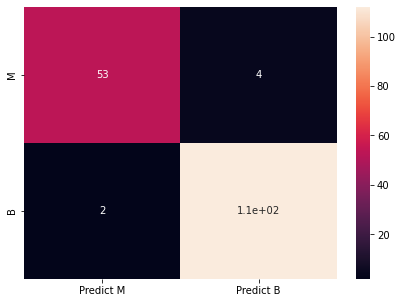

In [111]:
from sklearn import metrics

print('Confusion Matrix')

cm = metrics.confusion_matrix(y_test, KNN_predict, labels=['M','B'])

df_cm = pd.DataFrame(cm,index=[i for i in ['M','B']],
                     columns = [i for i in ['Predict M','Predict B'] ])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

### Choosing K

In [120]:
from sklearn.model_selection import cross_val_score

score_1 = []

for i in range(1,50):
    KNN_2 = KNeighborsClassifier(n_neighbors=i)
    score_2 = cross_val_score(KNN_2,Xscaled_df,y,cv=10) # cv = no. of times we are iterating
    score_1.append(score_2.mean())

In [121]:
score_2

array([0.96491228, 0.94736842, 0.94736842, 0.92982456, 0.96491228,
       0.98245614, 0.92982456, 0.94736842, 0.94736842, 0.96428571])

In [122]:
len(score_1)

49

Text(0, 0.5, 'Accuracy')

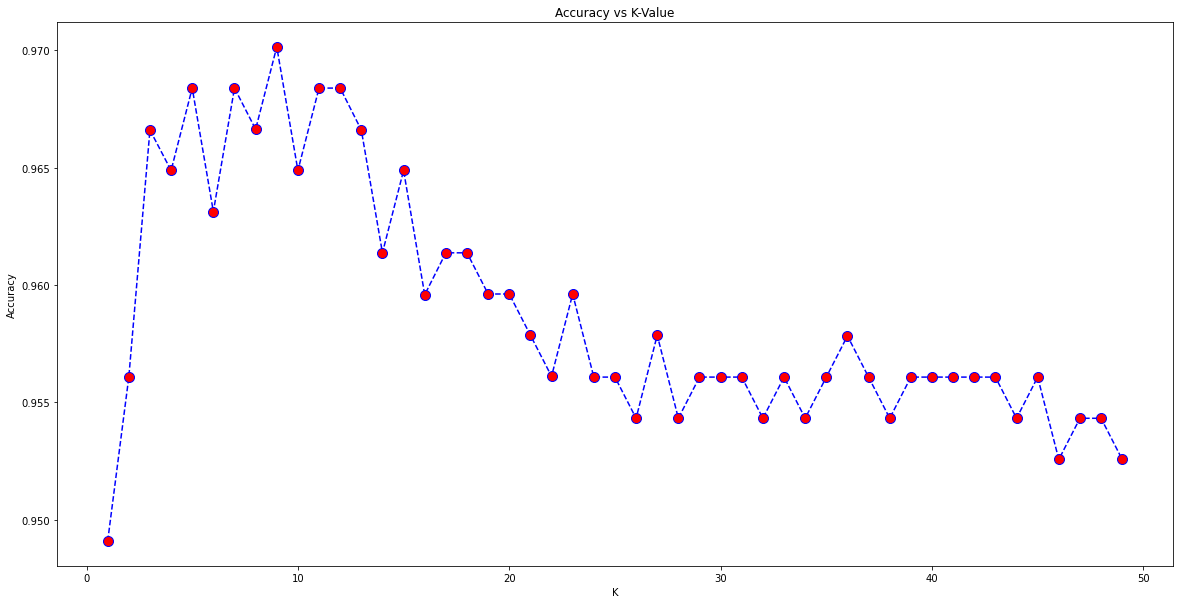

In [133]:
#Plotting the accuracy rate vs K_value

plt.figure(figsize=(20,10))
          
plt.plot(range(1,50),score_1,color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
           
plt.title("Accuracy vs K-Value")
plt.xlabel('K')
plt.ylabel('Accuracy')

In [154]:
# if K= 10
KNN = KNeighborsClassifier(n_neighbors=9, weights='distance')
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)
KNN.score(X_test,y_test)

0.9766081871345029

Confusion Matrix


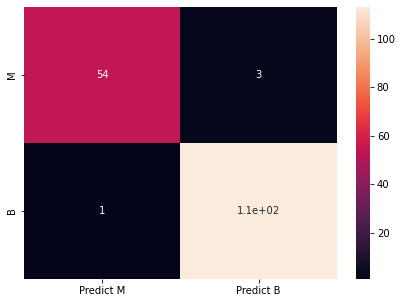

In [155]:
print('Confusion Matrix')

cm = metrics.confusion_matrix(y_test, KNN_predict, labels=['M','B'])

df_cm = pd.DataFrame(cm,index=[i for i in ['M','B']],
                     columns = [i for i in ['Predict M','Predict B'] ])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()